In [492]:
from qlasskit import qlassf, Qint, Qint2, Qfixed

@qlassf
def derivata(x: Qint[2]) -> Qint[3]:
    return (2 * (x+1) + 1 - (2 * (x-1) + 1))



Output: [3, 4, 5]


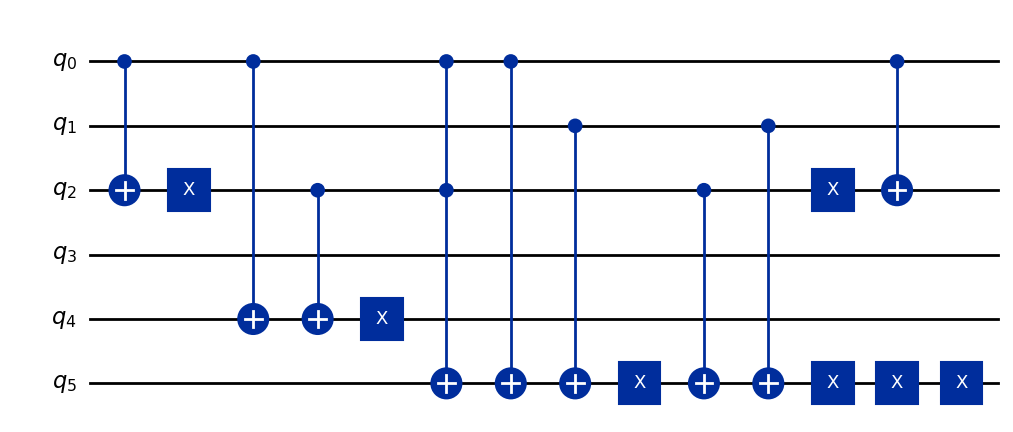

In [493]:
circuit = derivata.export("qiskit")
print("Output: " + str(derivata.output_qubits))
circuit.draw("mpl")

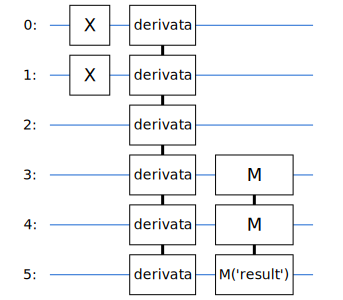

In [500]:
from cirq.contrib.svg import SVGCircuit
import cirq
circuit = cirq.Circuit()
circuit.append(cirq.X(cirq.LineQubit(0)))
circuit.append(cirq.X(cirq.LineQubit(1)))
circuit.append(derivata.export("cirq"))
#SVGCircuit(circuit)
#circuit = sum_two_numbers.export("cirq")
circuit.append(cirq.measure(cirq.LineQubit(5),cirq.LineQubit(4), cirq.LineQubit(3), key='result'))

# Add noise to the circuit.
noisy = circuit.with_noise(cirq.depolarize(p=0.05))

SVGCircuit(circuit)

Simulate the circuit:


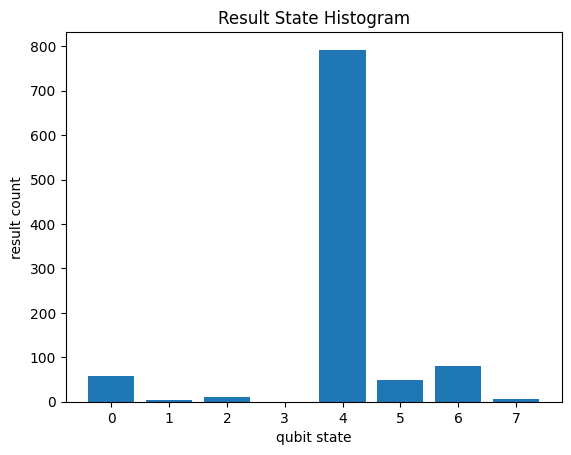

2.0


In [502]:
import matplotlib.pyplot as plt

s = cirq.Simulator()
print('Simulate the circuit:')
# Sample the circuit

samples = s.run(noisy, repetitions=1000)
cirq.plot_state_histogram(samples, plt.subplot())
plt.show()
print(samples.data['result'].mode()[0] / 2)
